In [1]:
import pandas as pd
import numpy as np

In [2]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week
    df['dayofyear'] = pd.DatetimeIndex(df['Date']).dayofyear
    df['weekday'] = pd.DatetimeIndex(df['Date']).weekday
    df['quarter'] = pd.DatetimeIndex(df['Date']).quarter
    df['is_month_start'] = pd.DatetimeIndex(df['Date']).is_month_start
    df['is_month_end'] = pd.DatetimeIndex(df['Date']).is_month_end


In [3]:
data3 = pd.read_csv('final_data.csv')

In [4]:
data3.head()

TRDTYPE  USASTATE  DISAGMOT  COUNTRY  MONTH  YEAR     VALUE      Date  \
0        1         2         2        1      6  2010    218276  6/1/2010   
1        1         2         1        1      6  2010  17127165  6/1/2010   
2        2         2         2        1      6  2010   2468944  6/1/2010   
3        2         2         1        1      6  2010  16985164  6/1/2010   
4        1         2         2        2      6  2010     11003  6/1/2010   

   impact  month_seq  
0  1851.0          0  
1  1851.0          0  
2  1851.0          0  
3  1851.0          0  
4  1851.0          0

In [5]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46749 entries, 0 to 46748
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TRDTYPE    46749 non-null  int64  
 1   USASTATE   46749 non-null  int64  
 2   DISAGMOT   46749 non-null  int64  
 3   COUNTRY    46749 non-null  int64  
 4   MONTH      46749 non-null  int64  
 5   YEAR       46749 non-null  int64  
 6   VALUE      46749 non-null  int64  
 7   Date       46749 non-null  object 
 8   impact     46749 non-null  float64
 9   month_seq  46749 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 3.6+ MB


<AxesSubplot:>

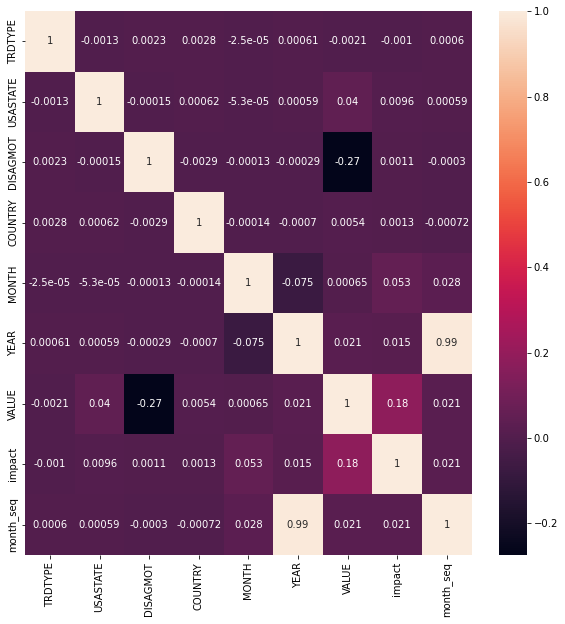

In [6]:
import matplotlib.pyplot as plt
import seaborn as sb
corr = data3.corr()
fig , ax = plt.subplots(figsize = (10,10))
sb.heatmap(corr, annot=True, ax = ax)

In [7]:
split_date(data3)

In [8]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46749 entries, 0 to 46748
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TRDTYPE         46749 non-null  int64         
 1   USASTATE        46749 non-null  int64         
 2   DISAGMOT        46749 non-null  int64         
 3   COUNTRY         46749 non-null  int64         
 4   MONTH           46749 non-null  int64         
 5   YEAR            46749 non-null  int64         
 6   VALUE           46749 non-null  int64         
 7   Date            46749 non-null  datetime64[ns]
 8   impact          46749 non-null  float64       
 9   month_seq       46749 non-null  int64         
 10  Day             46749 non-null  int64         
 11  WeekOfYear      46749 non-null  UInt32        
 12  dayofyear       46749 non-null  int64         
 13  weekday         46749 non-null  int64         
 14  quarter         46749 non-null  int64         
 15  is

In [9]:
data3.head()

TRDTYPE  USASTATE  DISAGMOT  COUNTRY  MONTH  YEAR     VALUE       Date  \
0        1         2         2        1      6  2010    218276 2010-06-01   
1        1         2         1        1      6  2010  17127165 2010-06-01   
2        2         2         2        1      6  2010   2468944 2010-06-01   
3        2         2         1        1      6  2010  16985164 2010-06-01   
4        1         2         2        2      6  2010     11003 2010-06-01   

   impact  month_seq  Day  WeekOfYear  dayofyear  weekday  quarter  \
0  1851.0          0    1          22        152        1        2   
1  1851.0          0    1          22        152        1        2   
2  1851.0          0    1          22        152        1        2   
3  1851.0          0    1          22        152        1        2   
4  1851.0          0    1          22        152        1        2   

   is_month_start  is_month_end  
0            True         False  
1            True         False  
2            True         False  
3            True         False  
4            True         False

In [10]:
data3['WeekOfYear'] = data3['WeekOfYear'].astype(np.int64)

In [11]:
data3 = pd.get_dummies(data3, columns=['YEAR'], drop_first=True, prefix='year')

data3 = pd.get_dummies(data3, columns=['MONTH'], drop_first=True, prefix='month')

data3 = pd.get_dummies(data3, columns=['weekday'], drop_first=True, prefix='wday')
data3 = pd.get_dummies(data3, columns=['quarter'], drop_first=True, prefix='qrtr')

data3 = pd.get_dummies(data3, columns=['is_month_start'], drop_first=True, prefix='m_start')

data3 = pd.get_dummies(data3, columns=['is_month_end'], drop_first=True, prefix='m_end')


In [12]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [13]:
data3 = data3.loc[data3['USASTATE'] == 6]
data3.drop(['USASTATE'],axis = 1)
X = data3.drop(["Date","VALUE" , "month_seq"], axis = 1)
X.head()
y = data3["VALUE"]
y = y.reset_index().drop("index", axis=1)
y.head()

VALUE
0   234466420
1  1049717162
2    71482870
3   663964717
4   171377579

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 736 entries, 4924 to 44755
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TRDTYPE     736 non-null    int64  
 1   USASTATE    736 non-null    int64  
 2   DISAGMOT    736 non-null    int64  
 3   COUNTRY     736 non-null    int64  
 4   impact      736 non-null    float64
 5   Day         736 non-null    int64  
 6   WeekOfYear  736 non-null    int64  
 7   dayofyear   736 non-null    int64  
 8   year_2011   736 non-null    uint8  
 9   year_2012   736 non-null    uint8  
 10  year_2013   736 non-null    uint8  
 11  year_2014   736 non-null    uint8  
 12  year_2015   736 non-null    uint8  
 13  year_2016   736 non-null    uint8  
 14  year_2017   736 non-null    uint8  
 15  year_2018   736 non-null    uint8  
 16  year_2019   736 non-null    uint8  
 17  month_2     736 non-null    uint8  
 18  month_3     736 non-null    uint8  
 19  month_4     736 non-null

In [16]:
y_test.head()

VALUE
117  2001214152
50     77430154
545   945281203
137  1148976547
120   250990737

In [17]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm


In [18]:
# XGboost
import xgboost as xgb

xgb.set_config(verbosity=0)
tuned_parameters = [{'max_depth': [5,10, 15, 20, 25, 30],'learning_rate':[0.001, 0.01, 0.1, 0.5], 'n_estimators': [100,150,200, 250, 300]}]
MSE_xgb = ['mean_squared_error(y_test,y_pred2)']
for value in MSE_xgb:
    regr = GridSearchCV(xgb.XGBRegressor(silent = True), tuned_parameters, cv=4)
    regr.fit(X_train, y_train.values.ravel())
    y_true, y_pred2 = y_test, regr.predict(X_test)
    
print('The best hyper-parameters for XGBBoost are: ',regr.best_params_)

The best hyper-parameters for XGBBoost are:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 250}


In [19]:
# Random Forests
tuned_parameters = [{'max_depth': [5,10, 15, 20, 50, 70], 'n_estimators': [10, 25, 50, 100,150, 200, 250]}]
MSE_rf = ['mean_squared_error(y_test, y_pred5)']
for value in MSE_rf:
    regr_rf = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=4)
    regr_rf.fit(X_train, y_train.values.ravel())
    y_true, y_pred5 = y_test, regr_rf.predict(X_test)
    
print('The best hyper-parameters for Random Forests are: ',regr_rf.best_params_)  

The best hyper-parameters for Random Forests are:  {'max_depth': 20, 'n_estimators': 150}


In [20]:
# XGBoost
regr = xgb.XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=150, random_state = 0, silent = True)
regr.fit(X_train, y_train)

# Random Forests
regr_rf = RandomForestRegressor(max_depth=15, random_state=0, n_estimators=100)
regr_rf.fit(X_train, y_train.values.ravel())

RandomForestRegressor(max_depth=15, random_state=0)

In [21]:
y_pred2 = regr.predict(X_test)                # XGBoost
y_pred5 = regr_rf.predict(X_test)             # Random Forests

In [22]:
MSE_xgb = mean_squared_error(y_test,y_pred2)
MSE_rf  = mean_squared_error(y_test,y_pred5)

In [23]:
print('The R^2 value for XGBoost Regressor is        :', round((r2_score(y_test,y_pred2)), 3))
print('The Adj R2 value for XGBoost Regressor is        :', round((1 - (1-r2_score(y_test,y_pred2))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))
print('The RMSE value for XGBoost Regressor is        :', round(np.sqrt(MSE_xgb)));

The R^2 value for XGBoost Regressor is        : 0.99
The Adj R2 value for XGBoost Regressor is        : 0.989
The RMSE value for XGBoost Regressor is        : 94473916


In [24]:
print('The R^2 value for Random Forests Regressor is :', round((r2_score(y_test,y_pred5)), 3))
print('The Adj R2 value for Random Forests Regressor is :', round((1 - (1-r2_score(y_test,y_pred5))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))
print('The RMSE value for Random Forests Regressor is :', round(np.sqrt(MSE_rf)));

The R^2 value for Random Forests Regressor is : 0.984
The Adj R2 value for Random Forests Regressor is : 0.984
The RMSE value for Random Forests Regressor is : 116823802


Text(0.5, 1.0, 'Xgboost')

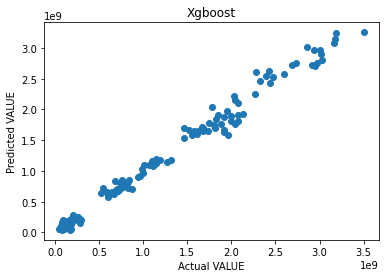

In [25]:
plt.scatter(y_test, y_pred2)
plt.xlabel("Actual VALUE")
plt.ylabel("Predicted VALUE")
plt.title("Xgboost")

Text(0.5, 1.0, 'Random Forest')

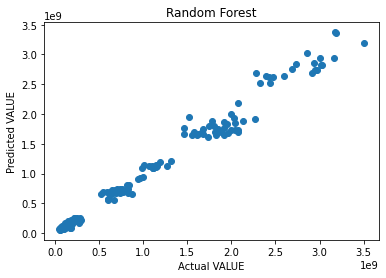

In [26]:
plt.scatter(y_test, y_pred5)
plt.xlabel("Actual VALUE")
plt.ylabel("Predicted VALUE")
plt.title("Random Forest")